# Generate generic elements

## 1 Importing lib

In [1]:
import cv2
import skimage 
import matplotlib.pyplot as plt
import numpy as np
import time
import os

import sys
sys.path.insert(0, "..")

from im_processing_fct.functions import *

## 2 Generic background elements generation

### 2.1 Outer arena

#### 2.1.1 Read images

In [2]:
im_outer_arena_gray = []
im_outer_arena_path = im_bg_dir_path.joinpath("outer_arena")

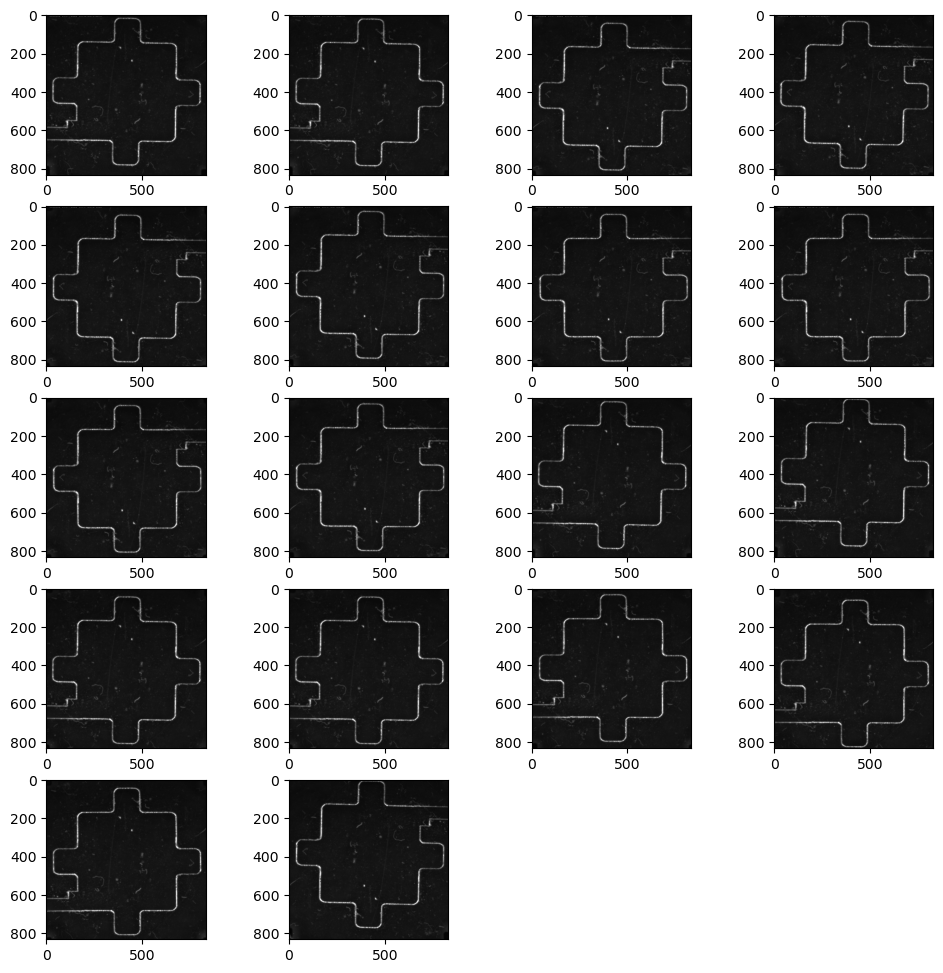

In [3]:

im_outer_arena_nb = 0
for img in im_outer_arena_path.rglob('img_0.jpg'):
    im = cv2.imread(img.as_posix())
    im_outer_arena_gray.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
    im_outer_arena_nb += 1

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb/5+1)), i+1),
    plt.imshow(im_outer_arena_gray[i], cmap='gray', vmin=0, vmax=255)

#### 2.1.2 Clean images

In [4]:
im_outer_arena_gray_clean = []

for i in range(im_outer_arena_nb):
    im_outer_arena_gray_clean.append(im_clean_contours(im_outer_arena_gray[i], "single_contour"))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_outer_arena_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb/5+1)), i+1), 
    plt.imshow(im_outer_arena_gray_clean[i], cmap='gray', vmin=0, vmax=255)

<Figure size 864x864 with 0 Axes>

#### 2.1.3 Template matching

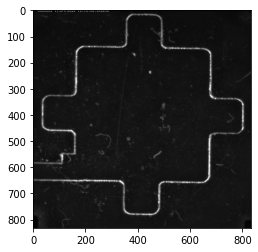

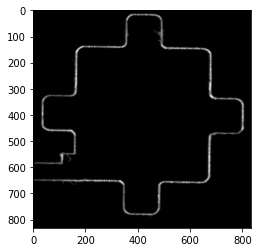

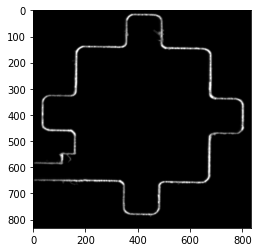

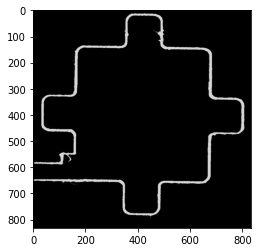

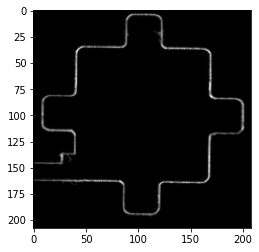

In [6]:
#compute homography with respect to the first image                                                          
H_outer_arena = []
for i in range(1, im_outer_arena_nb):
    H_outer_arena.append(compute_homography_orb(im_outer_arena_gray_clean[i], im_outer_arena_gray_clean[0])) 
        
im_outer_arena_gray_clean_trans = compute_gen_im_template(im_outer_arena_gray_clean, H_outer_arena, im_outer_arena_nb)
im_outer_arena_gray_clean_trans_resized = cv2.resize(im_outer_arena_gray_clean_trans, 
                                            (int(im_outer_arena_gray_clean_trans.shape[1]/rescaling_factor),
                                             int(im_outer_arena_gray_clean_trans.shape[0]/rescaling_factor)), 
                                             interpolation = cv2.INTER_AREA)

im_outer_arena_gray_clean_trans_enhance = enhance_center(im_outer_arena_gray_clean_trans)
im_outer_arena_gray_clean_trans_unif = uniform_illumination(im_outer_arena_gray_clean_trans)

'''
cv2.imwrite("im_outer_arena.jpg", im_outer_arena_gray_clean_trans)
cv2.imwrite("im_outer_arena_enhance.jpg", im_outer_arena_gray_clean_trans_enhance)
cv2.imwrite("im_outer_arena_unif.jpg", im_outer_arena_gray_clean_trans_unif)
cv2.imwrite("im_outer_arena_resized.jpg", im_outer_arena_gray_clean_trans_resized)
'''

plt.figure()
plt.imshow(im_outer_arena_gray[0], cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_enhance, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_unif, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_outer_arena_gray_clean_trans_resized, cmap='gray', vmin=0, vmax=255)

### 2.2 Rails

#### 2.2.1 Read images

In [7]:
#user defined
rail_nb = 3

im_rail_gray = []
im_rail_path = im_bg_dir_path.joinpath("rail")
im_rail_nb = 0

for dir_name in im_rail_path.rglob('*.PNG'):
    print (dir_name)
   # for img in (dir_name.glob('.PNG')):
    #    print (img)
    #for i in range(rail_nb):
    #    print(dir_name.rg)

/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail0/rail0.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail0/rail1.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail0/rail2.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail1/rail0.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail1/rail1.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail1/rail2.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail2/rail0.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail2/rail1.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/rail/rail2/rail2.PNG
/Volumes/Ramdya-Lab/DURRIEU_Matthias/

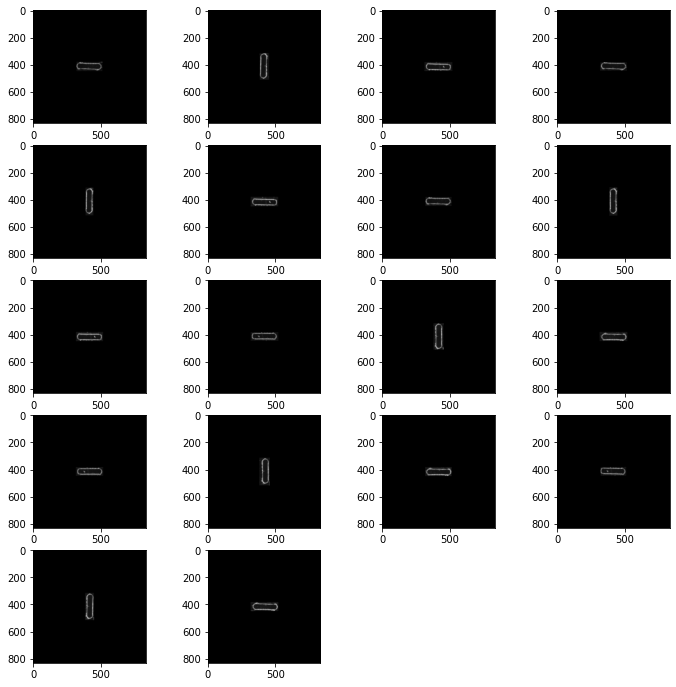

In [8]:

for imgs in im_rail_path.rglob('*.PNG'):
    im = cv2.imread(imgs.as_posix())
    im_pad_dim_y = int(np.floor((im_outer_arena_gray[0].shape[1]-im.shape[1])/2))
    if ((250-im.shape[1])%2):
        im_pad_dim_y_2 = im_pad_dim_y + 1
    else:
        im_pad_dim_y_2 = im_pad_dim_y

    im_pad_dim_x = int(np.floor((im_outer_arena_gray[0].shape[1]-im.shape[0])/2))
    if ((250-im.shape[0])%2):
        im_pad_dim_x_2 = im_pad_dim_x + 1
    else:
        im_pad_dim_x_2 = im_pad_dim_x

    im_pad = cv2.copyMakeBorder(im, im_pad_dim_x, im_pad_dim_x_2, im_pad_dim_y, im_pad_dim_y_2, cv2.BORDER_CONSTANT, (0,0,0))
    im_rail_gray.append(cv2.cvtColor(im_pad, cv2.COLOR_BGR2GRAY))
    im_rail_nb += 1


f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_rail_nb):
    plt.subplot(5, int(np.floor(im_rail_nb/5+1)), i+1),
    plt.imshow(im_rail_gray[i], cmap='gray', vmin=0, vmax=255)

##### 2.2.2 Clean images

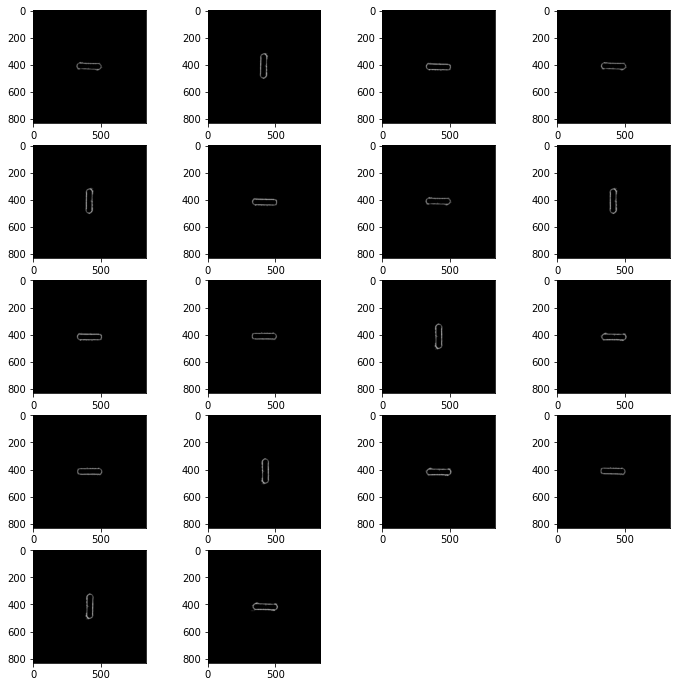

In [9]:
im_rail_gray_clean = []

for i in range(im_rail_nb):
    im_rail_gray_clean.append(im_clean_contours(im_rail_gray[i], "in_bet_two_contours", bin_thresh=40))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_rail_nb):
    plt.subplot(5, int(np.floor(im_outer_arena_nb/5+1)), i+1), 
    plt.imshow(im_rail_gray_clean[i], cmap='gray', vmin=0, vmax=255)

#### 2.2.2 Axes of inertia

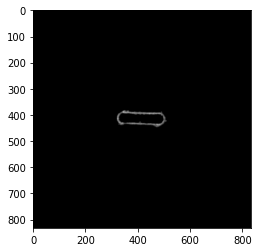

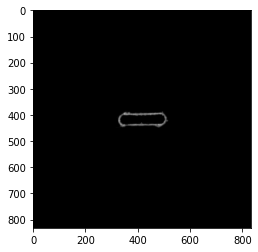

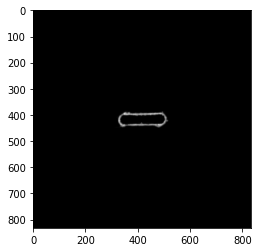

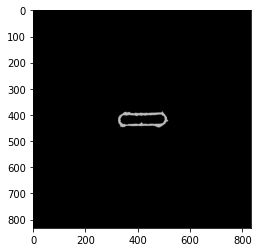

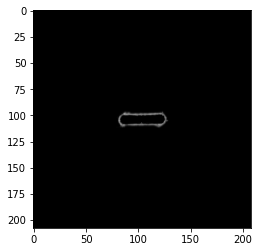

In [13]:
im_rail_gray_clean_trans = compute_gen_im_inertia(im_rail_gray_clean, im_rail_nb)
im_rail_gray_clean_trans_resized = cv2.resize(im_rail_gray_clean_trans, 
                                            (int(im_rail_gray_clean_trans.shape[1]/rescaling_factor),
                                             int(im_rail_gray_clean_trans.shape[0]/rescaling_factor)), 
                                             interpolation = cv2.INTER_AREA)

im_rail_gray_clean_trans_enhance = enhance_center(im_rail_gray_clean_trans)
im_rail_gray_clean_trans_unif = uniform_illumination(im_rail_gray_clean_trans)

cv2.imwrite(save_data_path.joinpath("im_rail.jpg").as_posix(), im_rail_gray_clean_trans)
#cv2.imwrite("im_rail_enhance.jpg", im_rail_gray_clean_trans_enhance)
cv2.imwrite(save_data_path.joinpath("im_rail_unif.jpg").as_posix() , im_rail_gray_clean_trans_unif)
#cv2.imwrite("im_rail_resized.jpg", im_rail_gray_clean_trans_resized)

plt.figure()
plt.imshow(im_rail_gray_clean[0], cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_rail_gray_clean_trans, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_rail_gray_clean_trans_enhance, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_rail_gray_clean_trans_unif, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_rail_gray_clean_trans_resized, cmap='gray', vmin=0, vmax=255)



### 2.3 Doors

#### 2.3.1 Read images

In [20]:
im_door_path = im_bg_dir_path.joinpath("door")
im_door_path.iterdir()

<generator object Path.iterdir at 0x7fbb10af8510>

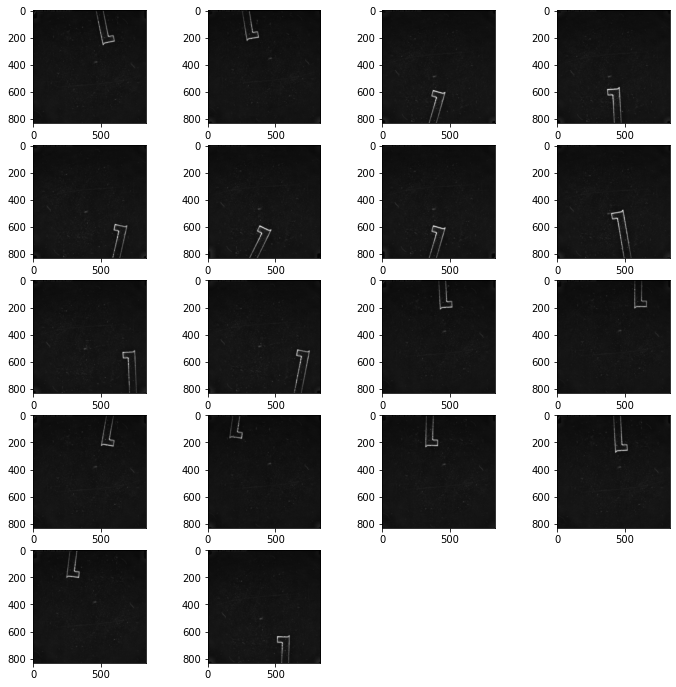

In [22]:
im_door_gray = []
im_door_path = im_bg_dir_path.joinpath("door")
im_door_nb = 0

for dirs in im_door_path.iterdir():
    im = cv2.imread(dirs.joinpath("img_0.jpg").as_posix())
    im_door_gray.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
    im_door_nb += 1

    
f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_rail_nb):
    plt.subplot(5, int(np.floor(im_door_nb/5+1)), i+1), 
    plt.imshow(im_door_gray[i], cmap='gray', vmin=0, vmax=255)

#### 2.3.2 Clean images

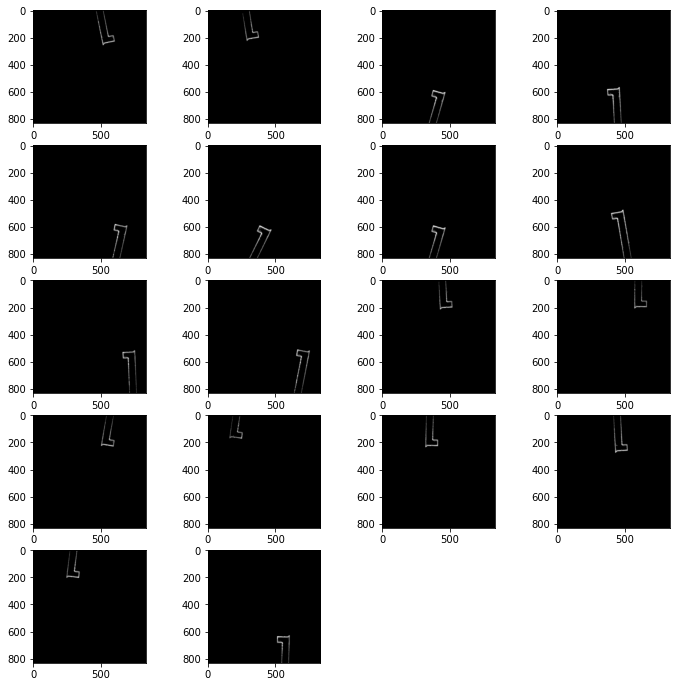

In [23]:
im_door_gray_clean = []

for i in range(im_door_nb):
    im_door_gray_clean.append(im_clean_contours(im_door_gray[i], "single_contour"))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_door_nb):
    plt.subplot(5, int(np.floor(im_door_nb/5+1)), i+1), 
    plt.imshow(im_door_gray_clean[i], cmap='gray', vmin=0, vmax=255)

#### 2.3.3 Template matching

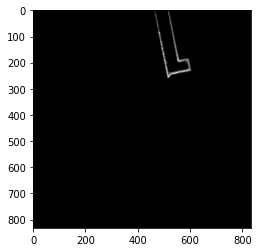

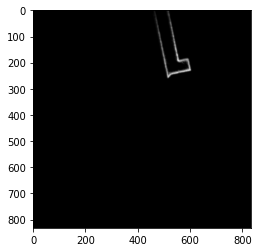

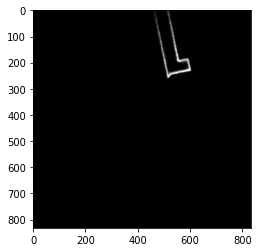

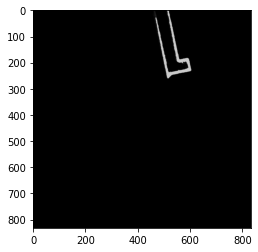

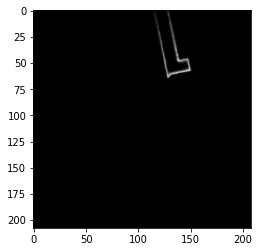

In [24]:
#compute homography with respect to the first image                                                          
H_door = []
for i in range(1, im_door_nb):
    H_door.append(compute_homography_orb(im_door_gray_clean[i], im_door_gray_clean[0])) 
        
im_door_gray_clean_trans = compute_gen_im_template(im_door_gray_clean, H_door, im_door_nb)
im_door_gray_clean_trans_resized = cv2.resize(im_door_gray_clean_trans, 
                                            (int(im_door_gray_clean_trans.shape[1]/rescaling_factor),
                                             int(im_door_gray_clean_trans.shape[0]/rescaling_factor)), 
                                             interpolation = cv2.INTER_AREA)

im_door_gray_clean_trans_enhance = enhance_center(im_door_gray_clean_trans)
im_door_gray_clean_trans_unif = uniform_illumination(im_door_gray_clean_trans)
'''
cv2.imwrite("im_door.jpg", im_door_gray_clean_trans)
cv2.imwrite("im_door_enhance.jpg", im_door_gray_clean_trans_enhance)
cv2.imwrite("im_door_unif.jpg", im_door_gray_clean_trans_unif)
cv2.imwrite("im_door_resized.jpg", im_door_gray_clean_trans_resized)
'''
plt.figure()
plt.imshow(im_door_gray_clean[0], cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_door_gray_clean_trans, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_door_gray_clean_trans_enhance, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_door_gray_clean_trans_unif, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_door_gray_clean_trans_resized, cmap='gray', vmin=0, vmax=255)

## 2.4 Arena and door

#### 2.4.1 Read images

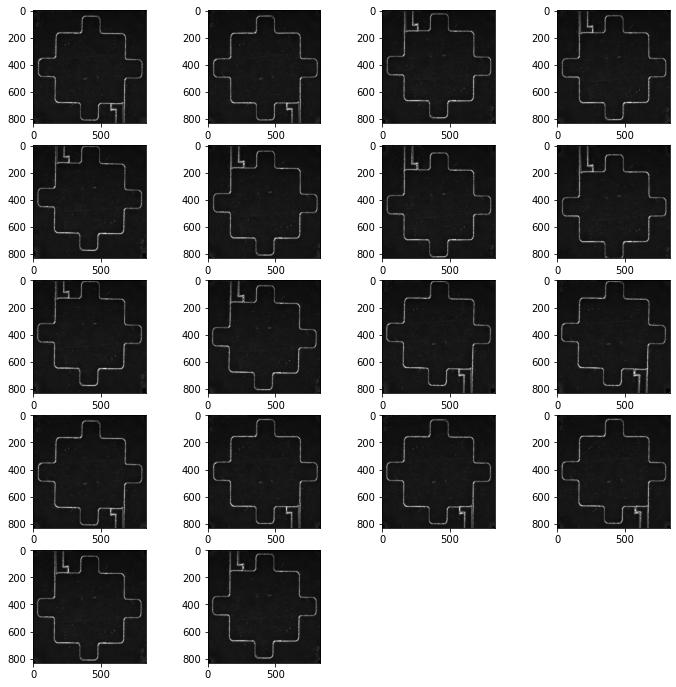

In [25]:
im_arena_door_gray = []
im_arena_door_path = im_bg_dir_path.joinpath("arena_door/")
im_arena_door_nb = 0
for dirs in im_arena_door_path.iterdir():
    im = cv2.imread(dirs.joinpath("img_0.jpg").as_posix())
    im_arena_door_gray.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))
    im_arena_door_nb += 1

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_arena_door_nb):
    plt.subplot(5, int(np.floor(im_arena_door_nb/5+1)), i+1), 
    plt.imshow(im_arena_door_gray[i], cmap='gray', vmin=0, vmax=255)

#### 2.4.2 Clean images

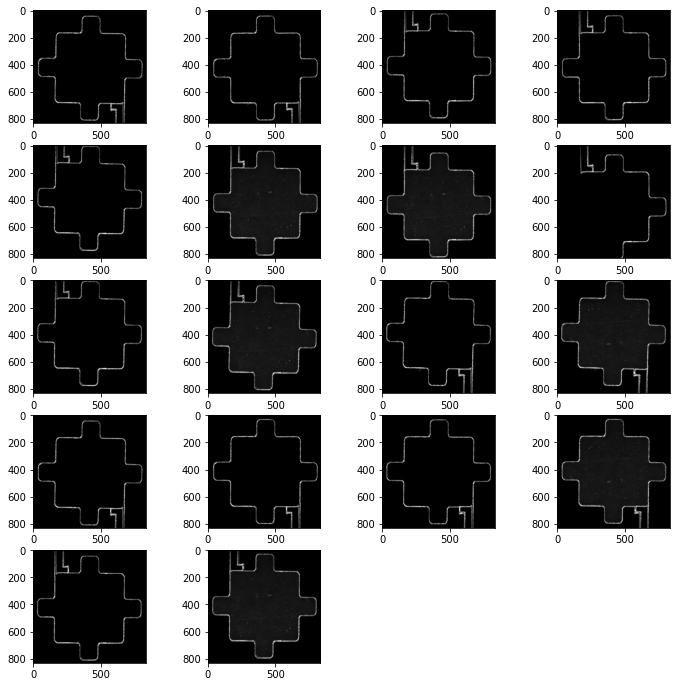

In [26]:
im_arena_door_gray_clean = []

for i in range(im_arena_door_nb):
    im_arena_door_gray_clean.append(im_clean_contours(im_arena_door_gray[i], "single_contour"))

f = plt.figure()
f.set_figheight(12)
f.set_figwidth(12)
for i in range(im_arena_door_nb):
    plt.subplot(5, int(np.floor(im_arena_door_nb/5+1)), i+1), 
    plt.imshow(im_arena_door_gray_clean[i], cmap='gray', vmin=0, vmax=255)

#### 2.4.3 Template matching

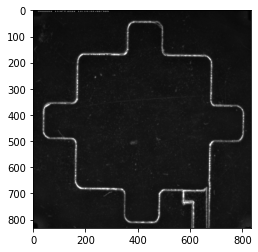

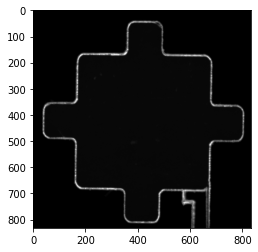

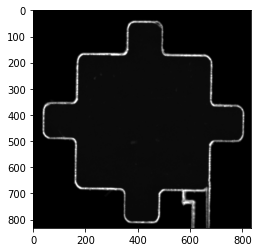

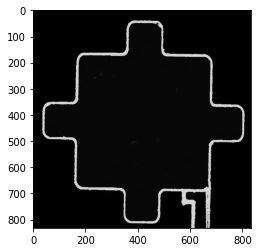

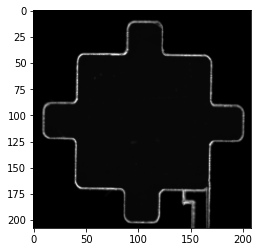

In [29]:
#compute homography with respect to the first image                                                          
H_arena_door = []
for i in range(1, im_arena_door_nb):
    H_arena_door.append(compute_homography_orb(im_arena_door_gray_clean[i], im_arena_door_gray_clean[0])) 
        
im_arena_door_gray_clean_trans = compute_gen_im_template(im_arena_door_gray_clean, H_arena_door, im_arena_door_nb)
im_arena_door_gray_clean_trans_resized = cv2.resize(im_arena_door_gray_clean_trans, 
                                            (int(im_arena_door_gray_clean_trans.shape[1]/rescaling_factor),
                                             int(im_arena_door_gray_clean_trans.shape[0]/rescaling_factor)), 
                                             interpolation = cv2.INTER_AREA)

im_arena_door_gray_clean_trans_enhance = enhance_center(im_arena_door_gray_clean_trans)
im_arena_door_gray_clean_trans_unif = uniform_illumination(im_arena_door_gray_clean_trans)


cv2.imwrite(save_data_path.joinpath("im_arena_door.jpg").as_posix(), im_arena_door_gray_clean_trans)
#cv2.imwrite("im_arena_door_enhance.jpg", im_arena_door_gray_clean_trans_enhance)
cv2.imwrite(save_data_path.joinpath("im_arena_door_unif.jpg").as_posix(), im_arena_door_gray_clean_trans_unif)
#cv2.imwrite("im_arena_door_resized.jpg", im_arena_door_gray_clean_trans_resized)

plt.figure()
plt.imshow(im_arena_door_gray[0], cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_arena_door_gray_clean_trans, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_arena_door_gray_clean_trans_enhance, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_arena_door_gray_clean_trans_unif, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(im_arena_door_gray_clean_trans_resized, cmap='gray', vmin=0, vmax=255)

## 3 Generic foreground elements generation

### 3.1 Glass Ball

#### 3.1.1 Read image

True

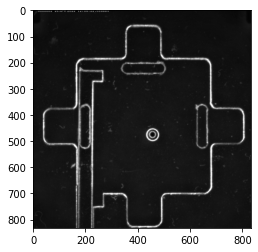

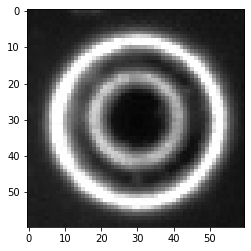

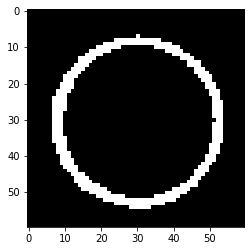

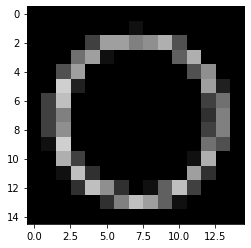

In [32]:
im_ball_path = im_fg_dir_path.joinpath("ball0")
im_ball = cv2.imread(im_ball_path.joinpath("img_0.jpg").as_posix())
im_ball_gray = cv2.cvtColor(im_ball, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_ball_gray, cmap='gray', vmin=0, vmax=255)

ball_gray = im_ball_gray[445:505, 426:486]

#has to be centered
plt.figure()
plt.imshow(ball_gray, cmap='gray', vmin=0, vmax=255)

#ball_gray_clean = im_clean_contours(ball_gray, "in_bet_two_contours", dil_kernel = np.ones((1,1), np.uint8), 
#                                    bin_thresh = 100)

#plt.figure()
#plt.imshow(ball_gray_clean, cmap='gray', vmin=0, vmax=255)

_, ball_gray_clean_bin = cv2.threshold(ball_gray, 215, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(ball_gray_clean_bin, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(cv2.resize(ball_gray_clean_bin,(int(ball_gray_clean_bin.shape[1]/rescaling_factor),
                                           int(ball_gray_clean_bin.shape[0]/rescaling_factor)), 
                                           interpolation = cv2.INTER_AREA), cmap='gray', vmin=0, vmax=255)

cv2.imwrite(save_data_path.joinpath("im_ball.jpg").as_posix(), ball_gray_clean_bin)


### 3.2 1.5mm Steel ball

#### 3.1.1 Read image


In [ ]:
im_ball_path = im_fg_dir_path.joinpath("ball0")
im_ball = cv2.imread(im_ball_path.joinpath("img_0.jpg").as_posix())
im_ball_gray = cv2.cvtColor(im_ball, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_ball_gray, cmap='gray', vmin=0, vmax=255)

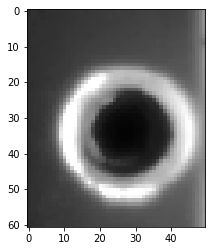

In [34]:

BallPath = im_fg_dir_path.joinpath("SteelBall15_0")
Ball = cv2.imread(BallPath.joinpath("SteelBall15_0.png").as_posix())
#has to be centered
plt.figure()
plt.imshow(Ball, cmap='gray', vmin=0, vmax=255)

#ball_gray_clean = im_clean_contours(ball_gray, "in_bet_two_contours", dil_kernel = np.ones((1,1), np.uint8),
#                                    bin_thresh = 100)

#plt.figure()
#plt.imshow(ball_gray_clean, cmap='gray', vmin=0, vmax=255)

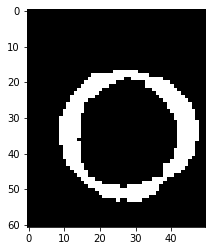

In [41]:

_, ball_gray_clean_bin = cv2.threshold(Ball, 180, 255, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(ball_gray_clean_bin, cmap='gray', vmin=0, vmax=255)

True

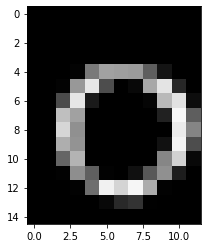

In [42]:

plt.figure()
plt.imshow(cv2.resize(ball_gray_clean_bin,(int(ball_gray_clean_bin.shape[1]/rescaling_factor),
                                           int(ball_gray_clean_bin.shape[0]/rescaling_factor)),
                                           interpolation = cv2.INTER_AREA), cmap='gray', vmin=0, vmax=255)

cv2.imwrite(save_data_path.joinpath("im_steelball15.jpg").as_posix(), ball_gray_clean_bin)
